In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./temperatures_anomalies.csv")

df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.head(5000)

,AnomalyScore,Region,Country,State,City,Month,Day,Year,AvgTemperature,MAD_Total,Tukey_Total,AnomalyLabel,Date
0,1.000000,North America,US,Additional Territories,San Juan Puerto Rico,12,31,2005,-99.0,1,1,1,2005-12-31
1,0.999362,North America,US,Additional Territories,San Juan Puerto Rico,1,1,2006,-99.0,1,1,1,2006-01-01
2,0.999308,North America,US,Additional Territories,San Juan Puerto Rico,12,30,2006,-99.0,1,1,1,2006-12-30
3,0.999263,North America,US,Additional Territories,San Juan Puerto Rico,1,5,2004,-99.0,1,1,1,2004-01-05
4,0.998955,North America,US,Additional Territories,San Juan Puerto Rico,1,29,2006,-99.0,1,1,1,2006-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.446751,North America,US,Colorado,Grand Junction,12,10,2013,-0.4,0,1,0,2013-12-10
4996,0.446713,North America,US,Alaska,Fairbanks,12,15,2011,-2.0,0,1,0,2011-12-15
4997,0.446639,North America,US,Alaska,Fairbanks,3,19,2012,-6.7,0,1,0,2012-03-19
4998,0.446609,North America,US,Alaska,Anchorage,1,19,2012,-1.7,0,1,0,2012-01-19


<Axes: >

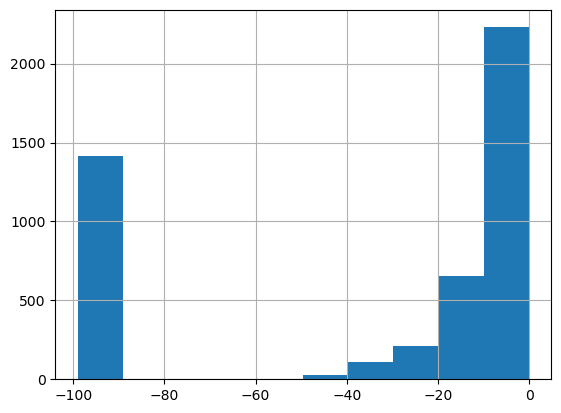

In [2]:
df[df["AnomalyLabel"] == 1]["AvgTemperature"].hist()

C:\Users\Joerg\AppData\Local\Temp\ipykernel_3444\1130729665.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Joerg\AppData\Local\Temp\ipykernel_3444\1130729665.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("./images/example.png", dpi=300)
c:\Users\Joerg\anaconda3\envs\dl_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


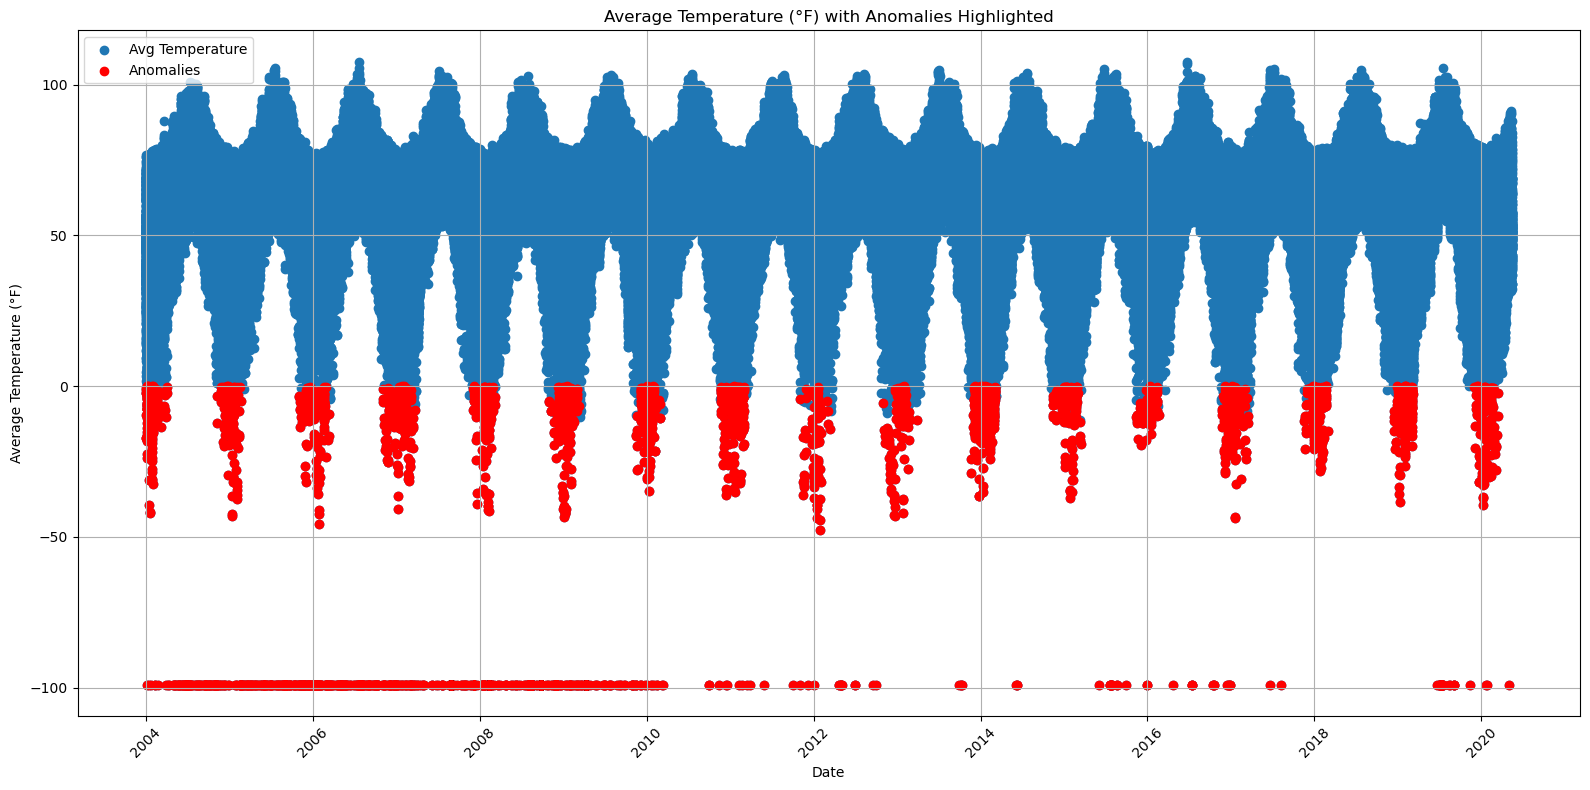

In [3]:
# Combine Year, Month, Day into a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Plotting
plt.figure(figsize=(16, 8))
plt.scatter(df['Date'], df['AvgTemperature'], label='Avg Temperature', marker='o')

# Highlight anomalies
anomalies = df[df['AnomalyLabel'] == 1]
plt.scatter(anomalies['Date'], anomalies['AvgTemperature'], color='red', label='Anomalies')

plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')
plt.title('Average Temperature (°F) with Anomalies Highlighted')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("./images/example.png", dpi=300)

plt.show()